In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Data/CSC705_Project/AVC_claims_survey.sql.csv')

In [4]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
display(data.head())

,reporting_easy,rep_knowledge,rep_courteous,contacting_easy,inspection_timely,appraisal_fair,satisfied,recommend,comments
0,5,5,5,5,5,5,5,5,The service I received was excellent.
1,3,3,3,4,4,3,4,4,I got my car fixed quickly that was nice. It a...
2,5,5,5,5,5,5,5,5,"Everyone involved, from my insurance agent to ..."
3,5,5,5,5,5,5,5,5,Safety always comes through for me. Thanks!
4,5,5,5,5,5,5,5,5,I received excellent servce .


In [5]:
# Ensure there are no NaN values in the comments column
data['comments'] = data['comments'].fillna('')

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the comments data
tfidf_matrix = tfidf_vectorizer.fit_transform(data['comments'])

# Display the shape of the resulting matrix
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")

TF-IDF Matrix Shape: (10699, 12715)


In [6]:
from sklearn.model_selection import train_test_split

X = tfidf_matrix
y = data['satisfied']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8559, 12715)
X_test shape: (2140, 12715)
y_train shape: (8559,)
y_test shape: (2140,)


In [7]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mse = mean_squared_error(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

Accuracy: 0.6276
Precision (weighted): 0.4707
Recall (weighted): 0.6276
F1 Score (weighted): 0.4846
Mean Squared Error: 2.2692


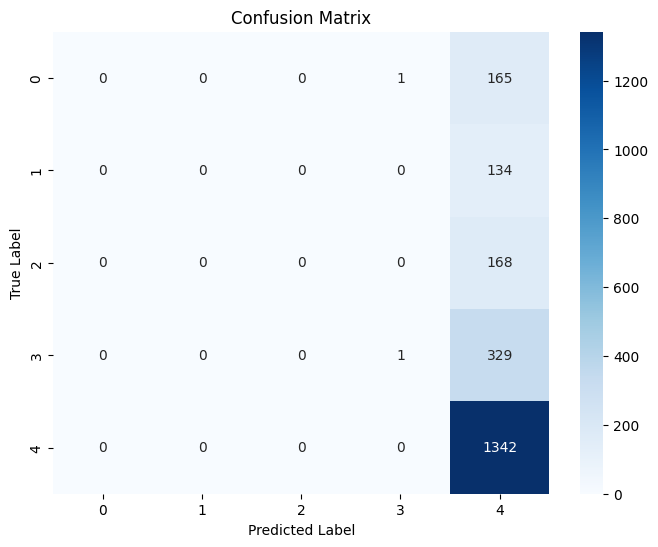

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
def get_alignment(satisfied_score):
    if satisfied_score in [4, 5]:
        return 'positive'
    elif satisfied_score in [1, 2]:
        return 'negative'
    else:
        return 'neutral'

data['align'] = data['satisfied'].apply(get_alignment)

display(data[['satisfied', 'align']].head())

,satisfied,align
0,5,positive
1,4,positive
2,5,positive
3,5,positive
4,5,positive


In [11]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
display(data.head())

,reporting_easy,rep_knowledge,rep_courteous,contacting_easy,inspection_timely,appraisal_fair,satisfied,recommend,comments,align
0,5,5,5,5,5,4,5,5,I am very happy with the Safety representative...,positive
1,5,5,5,5,5,4,5,5,Broberg Insurance was great.,positive
2,5,5,5,3,5,5,5,5,The only reason I answered the question regard...,positive
3,5,5,5,5,1,4,2,3,Safety subbed out the appraiser and adjuster i...,negative
4,5,5,5,5,5,5,5,5,I was honestly shocked at how easy and fast it...,positive


In [12]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the comments data
tfidf_matrix = tfidf_vectorizer.fit_transform(data['comments'])

In [13]:
X = tfidf_matrix
y = data['align']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8559, 12715)
X_test shape: (2140, 12715)
y_train shape: (8559,)
y_test shape: (2140,)


In [14]:
clf_align = MultinomialNB()
clf_align.fit(X_train, y_train)

MultinomialNB()

In [16]:
y_pred = clf_align.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

Accuracy: 0.7607
Precision (weighted): 0.7307
Recall (weighted): 0.7607
F1 Score (weighted): 0.6583


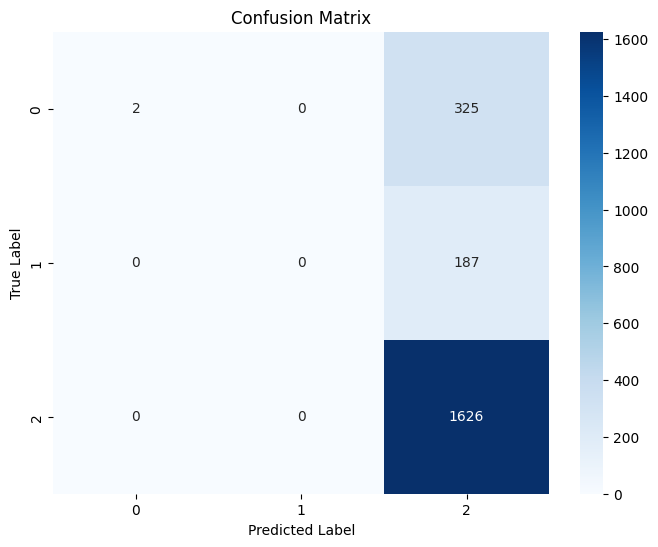

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()